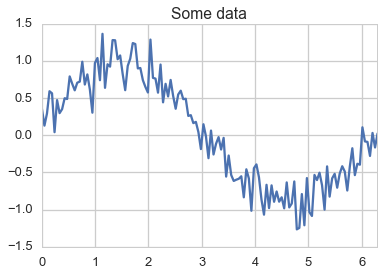

In [6]:
# <!-- collapse=True -->
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.callbacks import Callback

sns.set_style('whitegrid')
sns.set_context('talk')

np.random.seed(0)
x = np.linspace(0, 3 * math.pi, 200)
sine = np.sin(x)
err = np.random.normal(0, 0.2, len(sine))
y = sine + err
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlim([0, 2 * math.pi])
plt.title('Some data')
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()

n_conn = 10
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

# from keras.optimizers import RMSprop
# opti = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
# model.compile(loss='mean_squared_error', optimizer=opti)

In [8]:
# <!-- collapse=True -->
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
history = TrainingHistory()

In [9]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

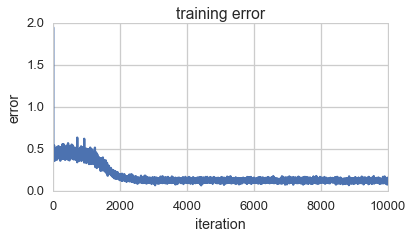

In [10]:
# <!-- collapse=True -->
# save the animation
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

def update_line(num):
    plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
    line.set_xdata(x)
    line.set_ydata(history.predictions[num])
    return []

ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('../videos/tiny-sine-net.mp4', dpi=100, extra_args=['-vcodec', 'libx264'])
plt.close()

plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, history.predictions[0], label='prediction')
plt.legend()
plt.title('iteration: 0')
plt.savefig('../images/tiny-sine-net-start.png')
plt.close()

plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')
plt.show()